# import necessary libraries

In [1]:
import numpy as np
import pandas as pd 
import re
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import nltk 
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Read and explore dataframe

In [2]:
df = pd.read_csv("training.1600000.processed.noemoticon.csv", encoding='ISO-8859-1')
df.head(10)

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
5,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
6,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
7,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
8,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?
9,0,1467812416,Mon Apr 06 22:20:16 PDT 2009,NO_QUERY,erinx3leannexo,spring break in plain city... it's snowing


Column names are a mess we need to rename them as mentioned in dataset documentation

In [3]:
df = df.rename(columns={'0': 'target', '1467810369': 'id', "Mon Apr 06 22:19:45 PDT 2009": 'date', "NO_QUERY": 'query', "_TheSpecialOne_": 'username',}
            )
df.columns.values[5]='content'


In [4]:
df

,target,id,date,query,username,content
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
...,...,...,...,...,...,...
1599994,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599995,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


# check dataframe shape

In [5]:
df.shape

(1599999, 6)

# check dataframe information

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   target    1599999 non-null  int64 
 1   id        1599999 non-null  int64 
 2   date      1599999 non-null  object
 3   query     1599999 non-null  object
 4   username  1599999 non-null  object
 5   content   1599999 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [7]:
df['target'] = df['target'].replace([0, 4],['Negative','Positive'])

# visualize how positive and negative feedback is distributed

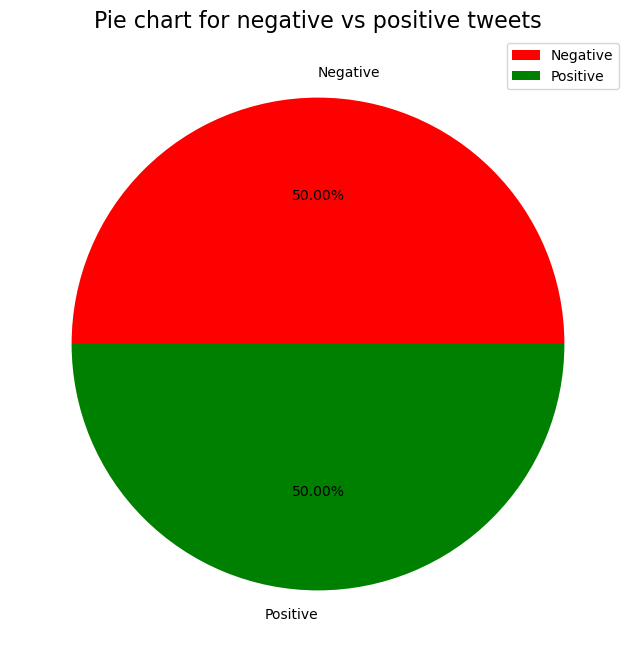

In [8]:
fig = plt.figure(figsize=(8,8))
targets = df.groupby('target').size()
targets.plot(kind='pie', subplots=True, figsize=(10, 8), autopct = "%.2f%%", colors=['red','green'])
plt.title("Pie chart for negative vs positive tweets",fontsize=16)
plt.ylabel("")
plt.legend()
plt.show()

# Analysis of positive tweeting users 

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


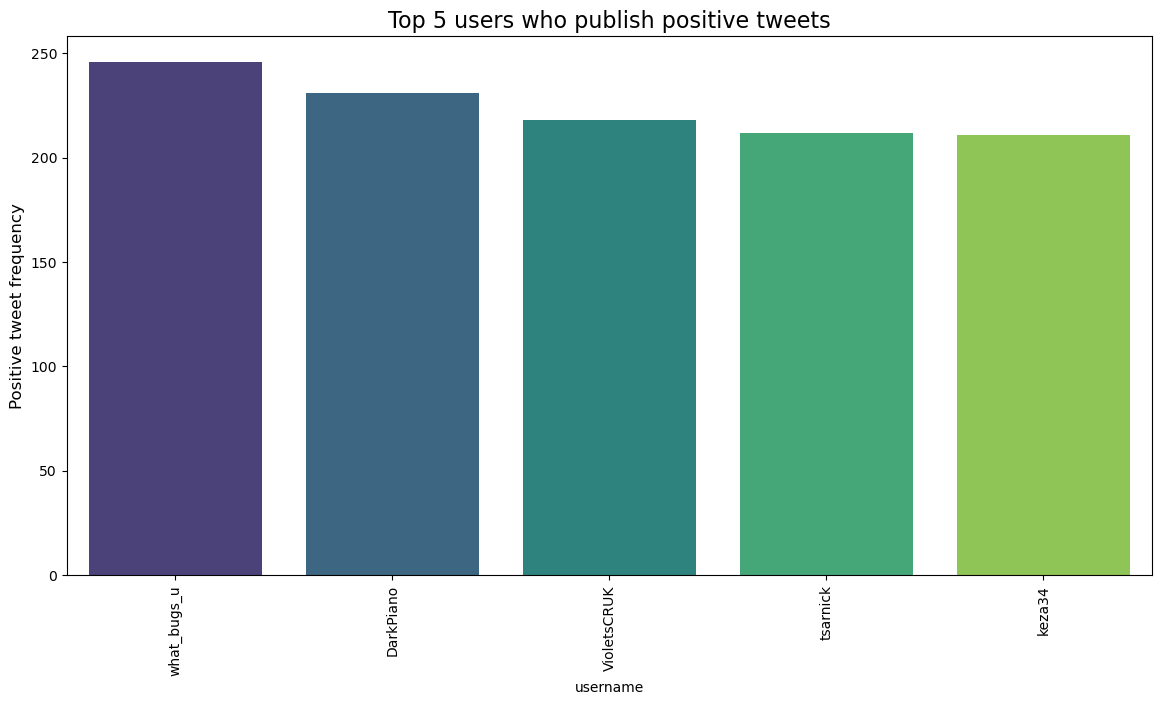

In [9]:
plt.figure(figsize=(14,7))
common_keyword=sns.barplot(x=df[df['target']=='Positive']['username'].value_counts()[:5].index, \
                           y=df[df['target']=='Positive']['username'].value_counts()[:5],palette='viridis')
common_keyword.set_xticklabels(common_keyword.get_xticklabels(),rotation=90)
common_keyword.set_ylabel('Positive tweet frequency',fontsize=12)
plt.title('Top 5 users who publish positive tweets',fontsize=16)
plt.show()

# Exploring negative tweets  by users

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


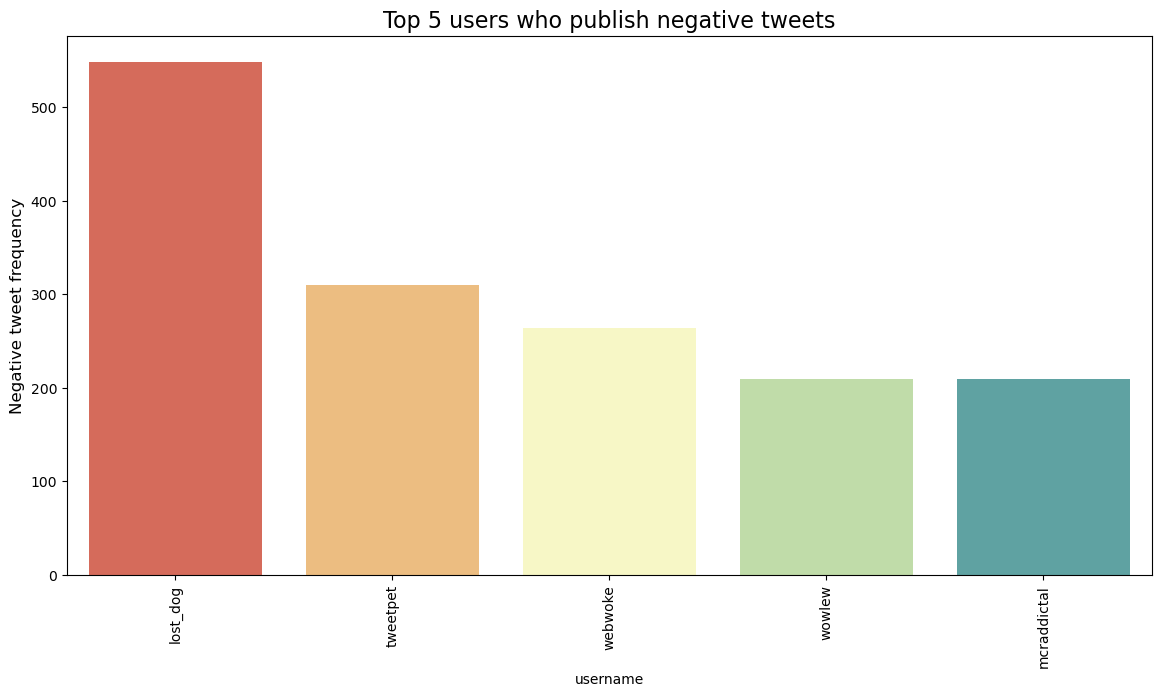

In [10]:
plt.figure(figsize=(14,7))
common_keyword=sns.barplot(x=df[df['target']=='Negative']['username'].value_counts()[:5].index, \
                           y=df[df['target']=='Negative']['username'].value_counts()[:5],palette='Spectral')
common_keyword.set_xticklabels(common_keyword.get_xticklabels(),rotation=90)
common_keyword.set_ylabel('Negative tweet frequency',fontsize=12)
plt.title('Top 5 users who publish negative tweets',fontsize=16)
plt.show()

# function for cleaning the unnecessary words

In [11]:
nltk.download('stopwords')
def clean(content):
    portstem = PorterStemmer()
    cleaned_content = re.sub("[^a-zA-Z]", " ", content)
    cleaned_content = cleaned_content.lower()
    cleaned_content = cleaned_content.split()
    stowords = set(stopwords.words('english'))
    cleaned_content = [portstem.stem(word) for word in cleaned_content if word not in stowords]
    cleaned_content = " ".join(cleaned_content)
    return cleaned_content

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
df['cleaned_data']=df['content'].apply(clean)
df.head()

,target,id,date,query,username,content,cleaned_data
0,Negative,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,upset updat facebook text might cri result sch...
1,Negative,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,kenichan dive mani time ball manag save rest g...
2,Negative,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole bodi feel itchi like fire
3,Negative,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",nationwideclass behav mad see
4,Negative,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew,kwesidei whole crew


# choosing our x and y dimensions for training

In [15]:
df.target = df.target.replace({'Positive': 1, 'Negative': 0})
X=df['cleaned_data'].values
Y=df["target"].values


# train and test data

In [16]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,stratify=Y,random_state=153)

# change values to numeric to operate on 

In [17]:
vectorizer=TfidfVectorizer()
X_train=vectorizer.fit_transform(X_train)
X_test= vectorizer.transform(X_test)

# Import logistic regression to apply it on numeric data

In [18]:
model=LogisticRegression(max_iter=1700)
model.fit(X_train,Y_train)

LogisticRegression(max_iter=1700)

# check model accuracy

In [19]:
Y_train_pred=model.predict(X_train)
accuracy=accuracy_score(Y_train,Y_train_pred)
accuracy

0.8102690085575072

# save model and load it to use it 

In [20]:
import pickle
pickle.dump(model,open("twitter_model","wb"))
with open("twitter_model", "rb") as file:
    trained = pickle.load(file)

# Genarlized function for tweets

In [21]:
def predict_tweet_reaction(tweet):
    cleaned_tweet = clean(tweet)
    tweet_vectorized = vectorizer.transform([cleaned_tweet])
    predicted_sentiment = trained.predict(tweet_vectorized)
    if predicted_sentiment==1:
         print("Positive feedback")
    else:
         print("Negative feedback")

# Manual tests 

In [22]:
new_tweets = [
    "Just finished a great workout at the gym! Feeling energized.",
    "Lost my wallet today. What a disaster!",
    "Enjoyed a delicious homemade dinner with my family.",
    "Feeling nervous about my upcoming job interview.",
    "Watched a hilarious comedy show tonight. Laughed so hard!",
    "Feeling grateful for the little things in life.",
    "Missed my morning train. Now I'm running late for work.",
    "Had a deep conversation with a friend. Feeling understood.",
    "Excited to start reading a new book I just bought.",
    "Feeling overwhelmed with deadlines. Need to stay focused."
]
for tweet in new_tweets:
    print(tweet)
    sentiment = predict_tweet_reaction(tweet)
    print()


Just finished a great workout at the gym! Feeling energized.
Positive feedback

Lost my wallet today. What a disaster!
Negative feedback

Enjoyed a delicious homemade dinner with my family.
Positive feedback

Feeling nervous about my upcoming job interview.
Negative feedback

Watched a hilarious comedy show tonight. Laughed so hard!
Positive feedback

Feeling grateful for the little things in life.
Positive feedback

Missed my morning train. Now I'm running late for work.
Negative feedback

Had a deep conversation with a friend. Feeling understood.
Positive feedback

Excited to start reading a new book I just bought.
Positive feedback

Feeling overwhelmed with deadlines. Need to stay focused.
Negative feedback



# check accuracy using confusion matrix

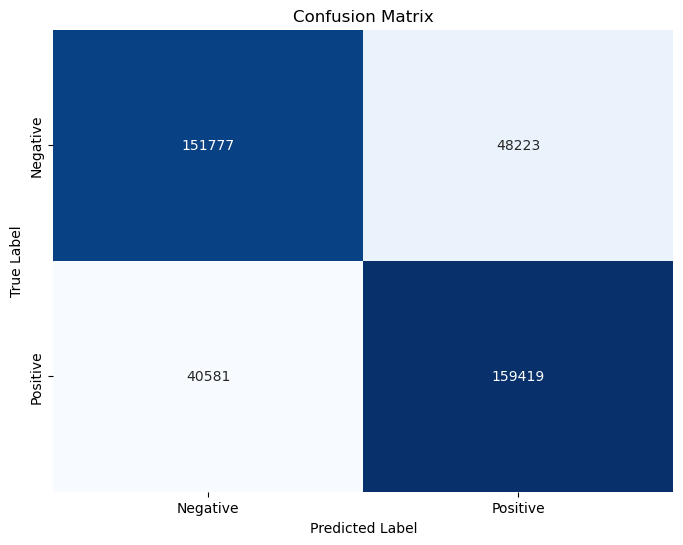

In [24]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()